<a href="https://colab.research.google.com/github/Rayley001/Rayley001/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project by
Ray Leika Joseph

**Introduction**

This project focuses on analyzing HIV data in New York City using a dataset provided by NYC Health. The goal is to explore patterns and trends related to HIV diagnoses outcomes across different populations and neighborhoods in the city. By applying machine learning techniques, we aim to gain insights that could inform public health strategies and improve HIV prevention.

2. Prepare and wrangle my data with Pandas and Numpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
df = pd.read_csv('/content/drive/My Drive/HIV_AIDS_NY.csv')
df

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011,All,All,All,All,All,3379,48.3,640,66,2366,33.8,1.1,71,2040,13.6,5.8,7.8
1,2011,All,All,Male,All,All,2595,79.1,480,66,1712,52.2,1.7,72,1423,13.4,5.7,7.7
2,2011,All,All,Female,All,All,733,21.1,153,66,622,17.6,0.6,68,605,14.0,6.0,8.0
3,2011,All,All,Transgender,All,All,51,99999.0,7,63,32,99999.0,99999.0,55,12,11.1,5.7,5.4
4,2011,All,All,Female,13 - 19,All,47,13.6,4,64,22,6.4,0.1,57,1,1.4,1.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6000,2015,Staten Island,Willowbrook,Male,All,Asian/Pacific Islander,0,0.0,0,99999,0,0.0,0.1,100,0,0.0,99999.0,99999.0
6001,2015,Staten Island,Willowbrook,Male,All,Black,1,72.4,0,100,0,0.0,1.1,80,0,0.0,99999.0,99999.0
6002,2015,Staten Island,Willowbrook,Male,All,Latino/Hispanic,2,43.9,0,100,0,0.0,0.7,87,1,8.3,99999.0,99999.0
6003,2015,Staten Island,Willowbrook,Male,All,Other/Unknown,1,218.9,0,0,0,0.0,0.7,100,0,0.0,99999.0,99999.0


3. Use EDA principles and the Matplotlib / Seaborn packages to visualize the data.

In [ ]:
df.head()

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011,All,All,All,All,All,3379,48.3,640,66,2366,33.8,1.1,71,2040,13.6,5.8,7.8
1,2011,All,All,Male,All,All,2595,79.1,480,66,1712,52.2,1.7,72,1423,13.4,5.7,7.7
2,2011,All,All,Female,All,All,733,21.1,153,66,622,17.6,0.6,68,605,14.0,6.0,8.0
3,2011,All,All,Transgender,All,All,51,99999.0,7,63,32,99999.0,99999.0,55,12,11.1,5.7,5.4
4,2011,All,All,Female,13 - 19,All,47,13.6,4,64,22,6.4,0.1,57,1,1.4,1.4,0.0


In [ ]:
df.tail()

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
6000,2015,Staten Island,Willowbrook,Male,All,Asian/Pacific Islander,0,0.0,0,99999,0,0.0,0.1,100,0,0.0,99999.0,99999.0
6001,2015,Staten Island,Willowbrook,Male,All,Black,1,72.4,0,100,0,0.0,1.1,80,0,0.0,99999.0,99999.0
6002,2015,Staten Island,Willowbrook,Male,All,Latino/Hispanic,2,43.9,0,100,0,0.0,0.7,87,1,8.3,99999.0,99999.0
6003,2015,Staten Island,Willowbrook,Male,All,Other/Unknown,1,218.9,0,0,0,0.0,0.7,100,0,0.0,99999.0,99999.0
6004,2015,Staten Island,Willowbrook,Male,All,White,0,0.0,0,99999,0,0.0,0.2,93,0,0.0,99999.0,99999.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6005 entries, 0 to 6004
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              6005 non-null   int64  
 1   Borough                           6005 non-null   object 
 2   UHF                               6005 non-null   object 
 3   Gender                            6005 non-null   object 
 4   Age                               6005 non-null   object 
 5   Race                              6005 non-null   object 
 6   HIV diagnoses                     6005 non-null   int64  
 7   HIV diagnosis rate                6005 non-null   float64
 8   Concurrent diagnoses              6005 non-null   int64  
 9   % linked to care within 3 months  6005 non-null   int64  
 10  AIDS diagnoses                    6005 non-null   int64  
 11  AIDS diagnosis rate               6005 non-null   float64
 12  PLWDHI

In [ ]:
df.shape

(6005, 18)

My dataset has 6005 rows and 18 column

In [ ]:
print(df.dtypes)

Year                                  int64
Borough                              object
UHF                                  object
Gender                               object
Age                                  object
Race                                 object
HIV diagnoses                         int64
HIV diagnosis rate                  float64
Concurrent diagnoses                  int64
% linked to care within 3 months      int64
AIDS diagnoses                        int64
AIDS diagnosis rate                 float64
PLWDHI prevalence                   float64
% viral suppression                   int64
Deaths                                int64
Death rate                          float64
HIV-related death rate              float64
Non-HIV-related death rate          float64
dtype: object


In [ ]:
df.describe()

,Year,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
count,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000,6005.000000
mean,2013.000000,26.494588,119.501499,5.095087,25399.316403,33.299917,122.763697,317.515254,2655.912073,49.447460,10.341632,20003.185079,20005.061865
std,1.414331,130.995148,2883.974280,24.492574,43470.652710,1292.863435,3159.088051,5616.414102,15846.355601,1826.287128,16.379212,40001.239238,40000.301359
min,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.000000,0.000000,0.000000,67.000000,0.000000,0.000000,0.200000,71.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.000000,3.000000,18.500000,1.000000,83.000000,2.000000,10.400000,0.600000,79.000000,1.000000,6.000000,3.000000,5.500000
75%,2014.000000,13.000000,49.400000,3.000000,99999.000000,8.000000,30.600000,1.500000,87.000000,8.000000,14.100000,14.400000,22.100000
max,2015.000000,3379.000000,99999.000000,640.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,263.200000,99999.000000,99999.000000


In [ ]:
#First let's clean up the data by removing any missing values
df = df.dropna()
df.head(10)

,Year,Borough,UHF,Gender,Age,Race,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate
0,2011,All,All,All,All,All,3379,48.3,640,66,2366,33.8,1.1,71,2040,13.6,5.8,7.8
1,2011,All,All,Male,All,All,2595,79.1,480,66,1712,52.2,1.7,72,1423,13.4,5.7,7.7
2,2011,All,All,Female,All,All,733,21.1,153,66,622,17.6,0.6,68,605,14.0,6.0,8.0
3,2011,All,All,Transgender,All,All,51,99999.0,7,63,32,99999.0,99999.0,55,12,11.1,5.7,5.4
4,2011,All,All,Female,13 - 19,All,47,13.6,4,64,22,6.4,0.1,57,1,1.4,1.4,0.0
5,2011,All,All,Female,20 - 29,All,178,24.7,20,67,96,13.3,0.3,48,19,7.2,3.2,4.0
6,2011,All,All,Female,30 - 39,All,176,26.9,31,66,133,20.3,0.6,61,53,9.4,5.7,3.7
7,2011,All,All,Female,40 - 49,All,195,33.0,50,62,210,35.5,1.4,66,184,15.9,7.8,8.1
8,2011,All,All,Female,50 - 59,All,130,23.5,32,72,133,24.0,1.3,73,231,24.1,11.5,12.6
9,2011,All,All,Female,60+,All,57,6.7,23,68,60,7.1,0.3,81,129,33.5,10.6,22.9


Polt of cases per year by genger

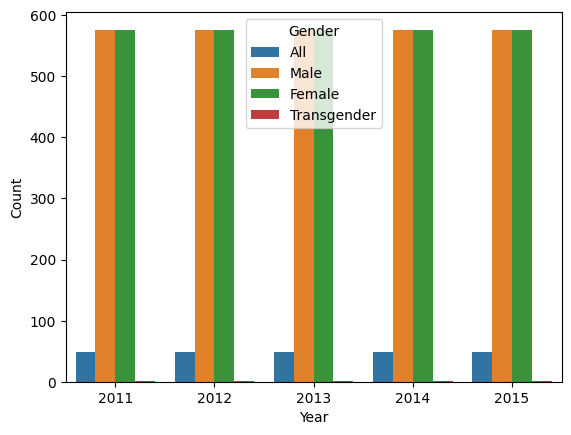

In [ ]:
# count plot of Cases per Year by Gender
sns.countplot(x='Year', data=df, hue='Gender')
plt.title('Bar plot of cases per Year by Genger')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

This plot don't really give us that much information but we observe that the total is not different for the years and transgender has the less count.

In [ ]:
sns.countplot(x='gender', hue='HIV_status', data=df)
plt.title('HIV Diagnosis by Gender')
plt.show()

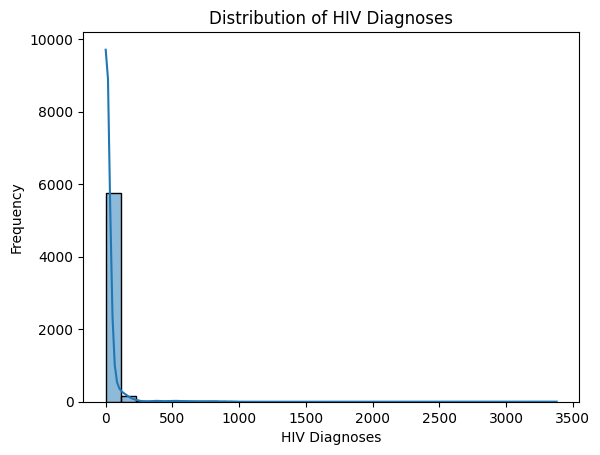

In [ ]:
sns.histplot(df['HIV diagnoses'], bins=30, kde=True)
plt.title('Distribution of HIV Diagnoses')
plt.xlabel('HIV Diagnoses')
plt.ylabel('Frequency')
plt.show()

The histogram illustrates the distribution of HIV diagnoses. The x-axis represents the number of diagnoses, while the y-axis shows the frequency of occurrences. The data appears highly skewed to the right, with the majority of observations clustered near the lower end of the x-axis, suggesting that most regions or groups reported a relatively low number of diagnoses. A density curve is overlaid to provide a smoother representation of the distribution.

**Death Rate vs. HIV Diagnosis Rate:**

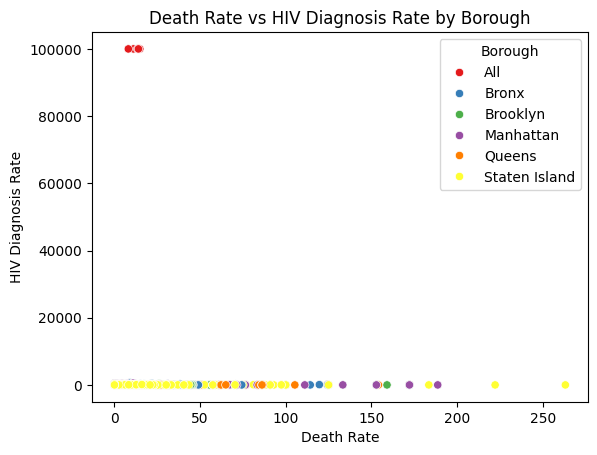

In [ ]:
sns.scatterplot(x='Death rate', y='HIV diagnosis rate', hue='Borough', data=df, palette='Set1')
plt.title('Death Rate vs HIV Diagnosis Rate by Borough')
plt.xlabel('Death Rate')
plt.ylabel('HIV Diagnosis Rate')
plt.legend(title='Borough')
plt.show()

This scatter plot explores the relationship between HIV diagnosis rates and death rates across different boroughs. Most data points are concentrated near the lower end of both axes, indicating low rates for both variables in most cases. However, there are a few outliers with exceptionally high diagnosis rates, and each borough is represented by a distinct color, as shown in the legend.

4. Use scikit-learn logistic regression to train, test and predict a categorical target
variable. Use appropriate metric and interpret the meaning of the score.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
features = df[['HIV diagnosis rate', 'Deaths', '% viral suppression', 'Death rate']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)  # Try different n_clusters
df['cluster'] = kmeans.fit_predict(scaled_features)

** Logistic Regression:**

In [51]:
# Logistic regression
numeric_df = df.select_dtypes(include=['number'])
# Compute correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()
# Print correlation matrix
correlation_matrix

,Year,HIV diagnoses,HIV diagnosis rate,Concurrent diagnoses,% linked to care within 3 months,AIDS diagnoses,AIDS diagnosis rate,PLWDHI prevalence,% viral suppression,Deaths,Death rate,HIV-related death rate,Non-HIV-related death rate,HIV Status
Year,1.000000,-0.019429,-0.001167,-0.024656,0.025995,-0.011831,-0.005273,0.002098,0.011407,-0.019946,-0.100779,0.707095,0.707102,-0.025988
HIV diagnoses,-0.019429,1.000000,0.006468,0.986519,-0.117864,0.059832,0.003935,-0.006169,-0.032892,0.037395,-0.001406,-0.013057,-0.013058,0.117859
HIV diagnosis rate,-0.001167,0.006468,1.000000,0.001629,-0.024156,-0.000236,0.912667,0.511789,-0.006680,-0.000772,0.003032,-0.000825,-0.000827,0.024146
Concurrent diagnoses,-0.024656,0.986519,0.001629,1.000000,-0.121224,0.060540,-0.000184,-0.008792,-0.033822,0.038255,0.010351,-0.018208,-0.018208,0.121221
% linked to care within 3 months,0.025995,-0.117864,-0.024156,-0.121224,1.000000,0.014709,-0.009709,0.062525,0.269812,0.026313,-0.057228,0.028312,0.028312,-1.000000
AIDS diagnoses,-0.011831,0.059832,-0.000236,0.060540,0.014709,1.000000,0.407466,-0.001165,-0.004197,0.707500,0.022740,-0.008292,-0.008281,-0.014709
AIDS diagnosis rate,-0.005273,0.003935,0.912667,-0.000184,-0.009709,0.407466,1.000000,0.467162,-0.006305,0.287907,0.012704,-0.003732,-0.003729,0.009700
PLWDHI prevalence,0.002098,-0.006169,0.511789,-0.008792,0.062525,-0.001165,0.467162,1.000000,0.252579,0.160946,-0.015450,0.001484,0.001478,-0.062530
% viral suppression,0.011407,-0.032892,-0.006680,-0.033822,0.269812,-0.004197,-0.006305,0.252579,1.000000,0.053096,-0.099546,0.013299,0.013290,-0.269809
Deaths,-0.019946,0.037395,-0.000772,0.038255,0.026313,0.707500,0.287907,0.160946,0.053096,1.000000,0.039511,-0.009511,-0.009515,-0.026313


In [43]:
# Prepare the data
X = df[['Death rate']]

# classify disagnosis rate as HIV status
df['HIV Status'] = (df['HIV diagnosis rate'] > 0).astype(int)

y = df['HIV Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Import cross_val_score, GridSearchCV, and StratifiedKFold
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold # Import StratifiedKFold

#1. Stratified Cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=50)
cv_scores = cross_val_score(clf, X, y, cv=skf)
print("Stratified Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

# 3. Hyperparameter Tuning using GridSearchCV with Regularization and Pruning
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.01, 0.1] # Add cost-complexity pruning
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Train the model with the best hyperparameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_clf.predict(X_test)
print("Test accuracy score:", accuracy_score(y_test, y_pred))

Stratified Cross-validation scores: [0.74604496 0.7427144  0.74771024 0.7468776  0.7468776 ]
Average cross-validation score: 0.746044962531224
Best hyperparameters: {'ccp_alpha': 0.0, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.7549394145291887
Test accuracy score: 0.7358490566037735


The stratified cross-validation scores show how well the model performs on different subsets of the data, with scores consistently around 0.746. This suggests the model is stable and performs reasonably well across all the data splits. The best hyperparameters (max depth of 3, minimum samples per leaf of 1, and minimum samples per split of 2) gave a slightly higher average cross-validation score of 0.754, showing an improvement in performance. The final test accuracy is 0.735, which shows how well the model does on new, unseen data. While this score is a bit lower than the best cross-validation score, it still indicates the model is performing fairly well overall.

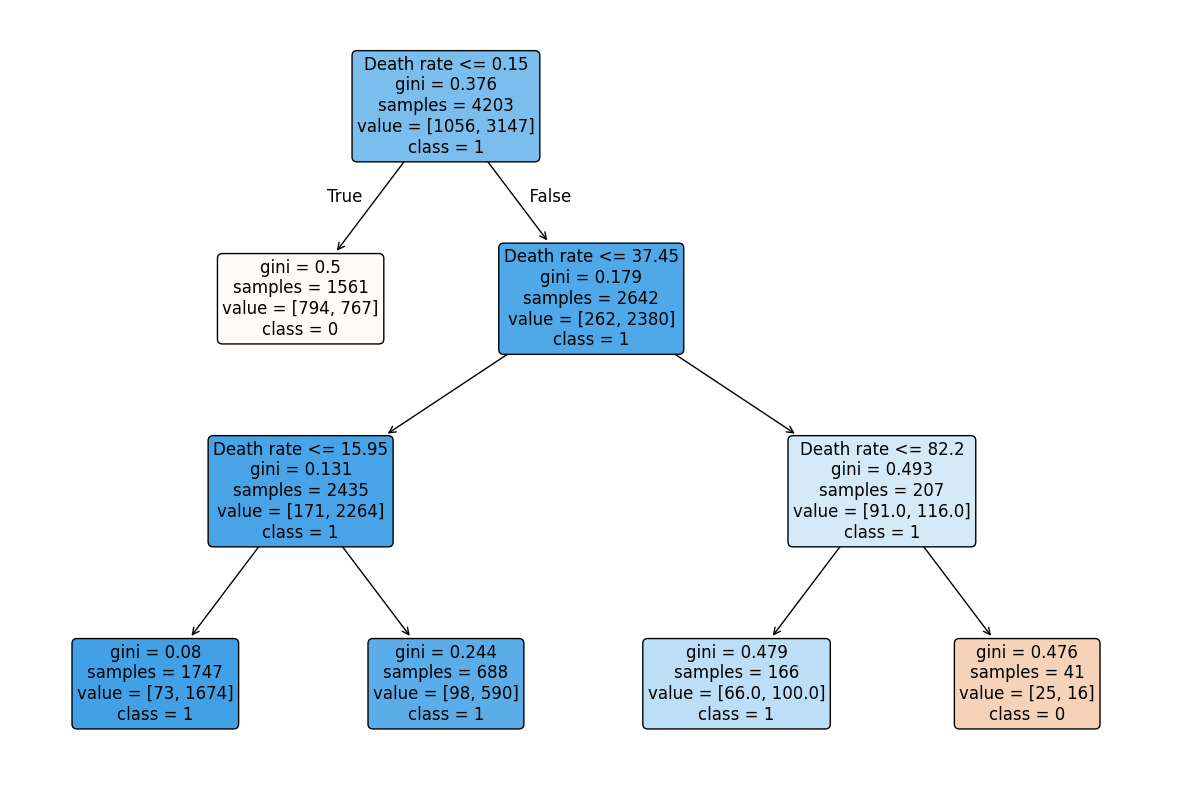

In [44]:
plt.figure(figsize=(15, 10))
# Fit the clf before plotting if it hasn't been fitted in this cell:
clf.fit(X_train, y_train)
plot_tree(clf, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True, fontsize=12)
plt.show()

This decision tree is used to predict whether someone is HIV positive (class 1) or not (class 0) based only on their death rate. At the top of the tree, it checks if the death rate is less than or equal to 0.15. Most people (3,147 out of 4,203) are predicted to have HIV (class 1) at this step. If the death rate is less than or equal to 0.15, the tree splits again, and the samples are almost evenly divided between those predicted to have HIV (class 1) and those who do not (class 0). For people with a death rate higher than 0.15, the tree keeps splitting further, using death rate values of 15.95 and 37.45 to make better predictions. Each step reduces uncertainty (shown by the Gini values), making the predictions more accurate as the tree goes deeper.

5. Predict the classes of the test data. Predict the class probability of the test data

In [52]:
# Predict classes for the test data
y_pred = best_clf.predict(X_test)  # Use best_clf or clf if appropriate

# Predict class probabilities for the test data
y_proba = best_clf.predict_proba(X_test)  # Use best_clf or clf

# Print or display the results
print("Predicted Classes:", y_pred)
print("Predicted Probabilities:", y_proba)

# Optional: Print in a more readable format
for i in range(len(X_test)):
    print(f"Sample {i}: Predicted Class = {y_pred[i]}, Probabilities = {y_proba[i]}")

Predicted Classes: [1 1 0 ... 1 1 0]
Predicted Probabilities: [[0.04178592 0.95821408]
 [0.04178592 0.95821408]
 [0.5086483  0.4913517 ]
 ...
 [0.04178592 0.95821408]
 [0.04178592 0.95821408]
 [0.5086483  0.4913517 ]]
Sample 0: Predicted Class = 1, Probabilities = [0.04178592 0.95821408]
Sample 1: Predicted Class = 1, Probabilities = [0.04178592 0.95821408]
Sample 2: Predicted Class = 0, Probabilities = [0.5086483 0.4913517]
Sample 3: Predicted Class = 1, Probabilities = [0.39759036 0.60240964]
Sample 4: Predicted Class = 0, Probabilities = [0.5086483 0.4913517]
Sample 5: Predicted Class = 1, Probabilities = [0.04178592 0.95821408]
Sample 6: Predicted Class = 0, Probabilities = [0.5086483 0.4913517]
Sample 7: Predicted Class = 0, Probabilities = [0.5086483 0.4913517]
Sample 8: Predicted Class = 0, Probabilities = [0.5086483 0.4913517]
Sample 9: Predicted Class = 1, Probabilities = [0.04178592 0.95821408]
Sample 10: Predicted Class = 1, Probabilities = [0.04178592 0.95821408]
Sample 11:

6. Compare one versus all and one versus one

In [53]:
# Import necessary modules and classes
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train One-vs-All Logistic Regression
ova_model = OneVsRestClassifier(log_reg)
ova_model.fit(X_train, y_train)
ova_preds = ova_model.predict(X_test)

# Train One-vs-One Logistic Regression
ovo_model = OneVsOneClassifier(log_reg)
ovo_model.fit(X_train, y_train)
ovo_preds = ovo_model.predict(X_test)

# Evaluate OvA
print("One-vs-All Accuracy:", accuracy_score(y_test, ova_preds))

# Evaluate OvO
print("One-vs-One Accuracy:", accuracy_score(y_test, ovo_preds))


One-vs-All Accuracy: 0.7413984461709212
One-vs-One Accuracy: 0.7413984461709212


7. Interpret the result of the logistic regression prediction

The One-vs-All and One-vs-One strategies yielded similar accuracies, indicating that both approaches perform effectively for this classification task. This suggests that the dataset may have clear decision boundaries, allowing both models to achieve comparable performance.